## Name: DEBARTHA PAUL

# GRIP Task 1: Prediction using Supervised ML

#### We have to predict the percentage of a student based on the number of study hours

### Importing libraries and visualising the data

We first load the libraries required for our work and then read the dataset

In [1]:
#Installing the necessary libraries
install.packages('Metrics')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
#Importing the necessary libraries
library(Metrics)

In [3]:
#Reading the dataset
s_data<-read.csv('http://bit.ly/w-data',header=T)
dim(s_data)#the dimensions of the dataset
head(s_data,n=5)#a brief preview of the dataset
names(s_data)#column names of the dataset

[1] 25  2

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30


[1] "Hours"  "Scores"

Now we plot the data points on a 2-D graph to check if there's any visible correlation between the variables

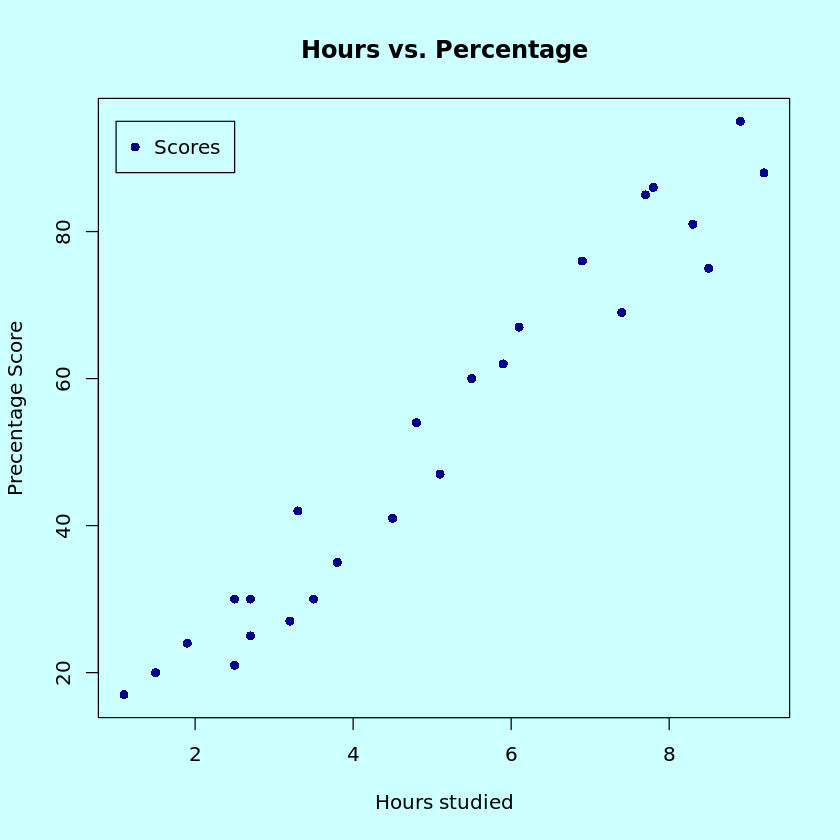

In [4]:
#Plotting the distribution of the scores
par(bg='#CCFFFF')
plot(s_data$Hours,s_data$Scores,pch=16,col='dark blue',
     xlab='Hours studied',ylab='Precentage Score',
     main='Hours vs. Percentage')
legend(x=1,y=95,'Scores',pch=16,col='dark blue')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

We now divide the data into attributes (inputs or x) and labels (outputs or y)

In [5]:
X<-s_data$Hours;Y<-s_data$Scores

Then, we split our data into training and test sets. We do this using the sample() method in R.

In [6]:
t_sample<-sample(nrow(s_data),floor(0.8*nrow(s_data)),replace=F)
X_train<-X[t_sample];Y_train<-Y[t_sample]
X_test<-X[-t_sample];Y_test<-Y[-t_sample]

### Training the Algorithm

In [7]:
model<-lm(Y_train~X_train)

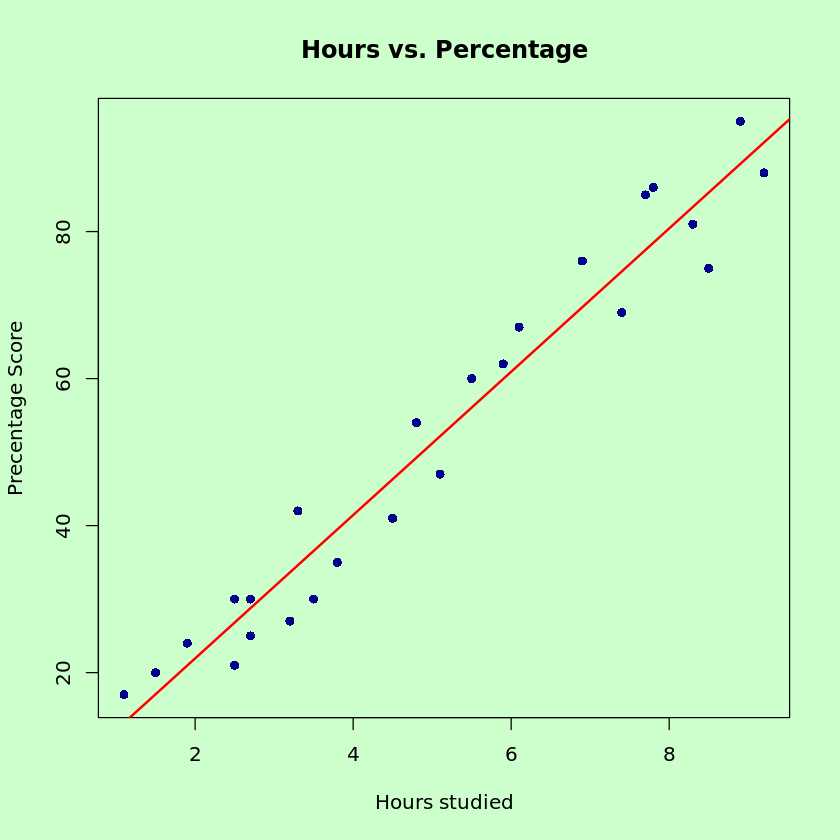

In [8]:
#Plotting the regression line and the test data
par(bg='#CCFFCC')
plot(s_data$Hours,s_data$Scores,pch=16,col='dark blue',
     xlab='Hours studied',ylab='Precentage Score',
     main='Hours vs. Percentage')
abline(model,col='red',lwd=2)

### Making Predictions

Now, it's time to make some predictions using our trained agorithm.

In [9]:
X_test#Testing data
Y_predicted<-predict(model,newdata=data.frame(X_train=X_test))#Predicting the scores

[1] 9.2 4.5 8.9 1.9 6.1

In [10]:
#Comparing Actual vs. Predicted values
df<-data.frame('Hours'=X_test,'Actual score'=Y_test,'Predicted score'=Y_predicted)
df

,Hours,Actual.score,Predicted.score
,<dbl>,<int>,<dbl>
1,9.2,88,92.13173
2,4.5,41,46.30886
3,8.9,95,89.20687
4,1.9,24,20.96003
5,6.1,67,61.90813


Predicting the score of a student who studied for 9.25 hours:

In [11]:
pred<-predict(model,newdata=data.frame(X_train=9.25))
pr_data<-data.frame('Hours'=9.25,'Predicted Score'=pred)
pr_data

,Hours,Predicted.Score
,<dbl>,<dbl>
1,9.25,92.61921


### Evaluating the model

Finally, we evaluate the performance of the model. We chose the mean absolute error as the measure of performance of the algorithm (lower is better):

In [12]:
mae(df$Actual,df$Predicted)

[1] 4.673111